<a href="https://colab.research.google.com/github/kaliappan01/Exploring_ML_models/blob/main/Guassian_Mixture_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets
import numpy as np
import pandas as pd

In [2]:
from sklearn.mixture import GaussianMixture

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [4]:
std_scl = StandardScaler()
features_standardized = std_scl.fit_transform(X)

In [5]:
data = pd.DataFrame(np.column_stack([X,y]),columns = iris.feature_names+["label"])
pca = PCA(n_components=2)
features_2D = pca.fit_transform(features_standardized)

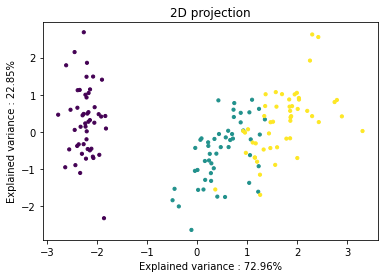

In [6]:
ev1,ev2 = pca.explained_variance_ratio_
ax = plt.figure().gca(title = "2D projection",
                      xlabel = "Explained variance : {:.2%}".format(ev1),
                      ylabel = "Explained variance : {:.2%}".format(ev2))
ax.scatter(*features_2D.T,c=data.label, s=10)

BIC = Min(ln(n)*k - 2*ln(L_cap))

In [7]:
from sklearn.metrics import adjusted_mutual_info_score

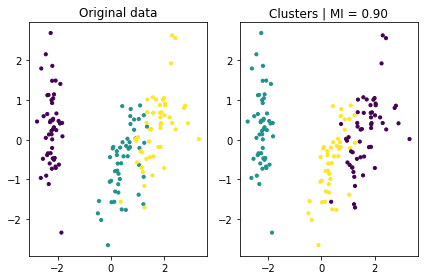

In [8]:
n_components = 3
GMM = GaussianMixture(n_components=n_components)
GMM.fit(features_standardized)
data['clusters'] = GMM.predict(features_standardized)
fig, axes = plt.subplots(ncols = 2)
labels, clusters = y,data.clusters
mi = adjusted_mutual_info_score(y, clusters)
axes[0].scatter(*features_2D.T, c = data.label,s=10)
axes[0].set_title("Original data")
axes[1].scatter(*features_2D.T, c = data.clusters,s=10)
axes[1].set_title("Clusters | MI = {:.2f}".format(mi))
plt.tight_layout()


In [9]:
xmin, ymin = features_2D.min(axis = 0)
xmax, ymax = features_2D.max(axis = 0)

x = np.linspace(xmin, xmax, 500)
y = np.linspace(ymin, ymax, 500)
X, Y = np.meshgrid(x,y)

simulated_2D = np.column_stack([np.ravel(X),np.ravel(Y)])
simulated_4D = pca.inverse_transform(simulated_2D)
Z = np.atleast_2d(np.clip(np.exp(GMM.score_samples(simulated_4D)), a_min = 0, a_max = 1)).reshape(X.shape)

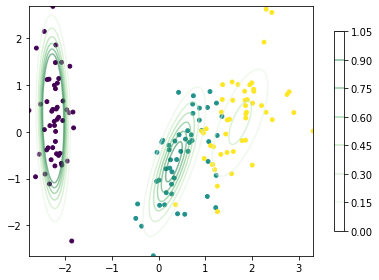

In [10]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
CS = ax.contour(X, Y, Z, cmap="Greens", alpha=.5)
CB = plt.colorbar(CS, shrink = 0.8)
ax.scatter(*features_2D.T, c = data.label, s = 15)
fig.tight_layout()

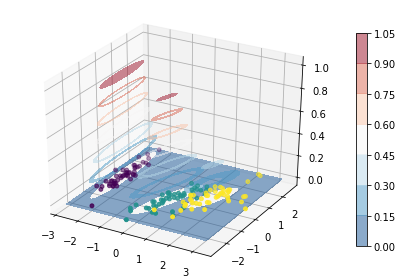

In [11]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
# ax.set_aspect('equal')
CS = ax.contourf3D(X, Y, Z, cmap="RdBu_r", alpha=.5)
CB = plt.colorbar(CS, shrink = 0.8)
ax.scatter(*features_2D.T, c = data.label, s = 15)
fig.tight_layout()

In [12]:
bic = {}
for n_components in range(2, 8):
  gmm = GaussianMixture(n_components=n_components)
  gmm.fit(features_standardized)
  bic[n_components] = gmm.bic(features_standardized)
pd.Series(bic,name = "Bayesian Information Criterion")

2     794.709002
3     801.550596
4     849.300878
5     920.734644
6     970.525604
7    1022.161638
Name: Bayesian Information Criterion, dtype: float64